In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


In [19]:
df = pd.read_csv("../data/tn.movie_budgets.csv")
df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [14]:
df.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


DATA CLEANING

In [17]:
#checking for missing values

df.isnull().sum()


id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [18]:
#check and clean duplicates
df.duplicated().sum()


0

In [27]:
def convert_currency_to_numeric(column):
    """
    Convert currency strings to numeric values by removing '$' and ','.
    """
    # 1. Convert the column to string type first to ensure .str is available
    column_as_string = column.astype(str)
    
    # 2. Apply string replacement
    cleaned_column = column_as_string.str.replace('$', '', regex=False).str.replace(',', '', regex=False)
    
    # 3. Convert the cleaned strings to float (or int) for mathematical operations
    return pd.to_numeric(cleaned_column)


In [29]:
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [30]:

#Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

#Extract year from release date
df['release_year'] = df['release_date'].dt.year

In [31]:
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017


In [33]:
#Calculate additional financial metrics
df['profit'] = df['worldwide_gross'] - df['production_budget']
df['roi'] = (df['profit'] / df['production_budget']) * 100
df['profit_margin'] = (df['profit'] / df['worldwide_gross']) * 100

df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,movie_clean,profit,roi,profit_margin
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,Avatar,2.351345e+09,553.257713,84.692106
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,Pirates of the Caribbean: On Stranger Tides,6.350639e+08,154.667286,60.733080
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,Dark Phoenix,-2.002376e+08,-57.210757,-133.703598
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,Avengers: Age of Ultron,1.072414e+09,324.384139,76.436443
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,Star Wars Ep. VIII: The Last Jedi,9.997217e+08,315.369636,75.925058


In [48]:
# Replace infinite values with NaN for movies with 0 gross
df['profit_margin'] = df['profit_margin'].replace([np.inf, -np.inf], np.nan)
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,movie_clean,profit,roi,profit_margin,month
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,Avatar,2.351345e+09,553.257713,84.692106,December
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,Pirates of the Caribbean: On Stranger Tides,6.350639e+08,154.667286,60.733080,May
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,Dark Phoenix,-2.002376e+08,-57.210757,-133.703598,June
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,Avengers: Age of Ultron,1.072414e+09,324.384139,76.436443,May
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,Star Wars Ep. VIII: The Last Jedi,9.997217e+08,315.369636,75.925058,December
...,...,...,...,...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,2018,Red 11,-7.000000e+03,-100.000000,NaN,December
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,1999,Following,2.344950e+05,3908.250000,97.505146,April
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,2005,Return to the Land of Wonders,-3.662000e+03,-73.240000,-273.692078,July
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,2015,A Plague So Pleasant,-1.400000e+03,-100.000000,NaN,September


In [35]:
#handling outliers

def remove_financial_outliers(df, columns, threshold=3):
    """Remove outliers using z-score method"""
    df = df.copy()
    for col in columns:
        if col in df.columns:
            z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
            df = df[z_scores < threshold]
    return df

# Remove outliers for better visualization (keep original for analysis)
df_no_outliers = remove_financial_outliers(df, ['production_budget', 'worldwide_gross', 'profit'])

print(f"Original data shape: {df.shape}")
print(f"Data shape after outlier removal: {df_no_outliers.shape}")
print("\nBasic statistics after cleaning:")
print(df[['production_budget', 'domestic_gross', 'worldwide_gross', 'profit', 'roi']].describe())

Original data shape: (5782, 11)
Data shape after outlier removal: (5342, 11)

Basic statistics after cleaning:
       production_budget  domestic_gross  worldwide_gross        profit  \
count       5.782000e+03    5.782000e+03     5.782000e+03  5.782000e+03   
mean        3.158776e+07    4.187333e+07     9.148746e+07  5.989970e+07   
std         4.181208e+07    6.824060e+07     1.747200e+08  1.460889e+08   
min         1.100000e+03    0.000000e+00     0.000000e+00 -2.002376e+08   
25%         5.000000e+06    1.429534e+06     4.125415e+06 -2.189071e+06   
50%         1.700000e+07    1.722594e+07     2.798445e+07  8.550286e+06   
75%         4.000000e+07    5.234866e+07     9.764584e+07  6.096850e+07   
max         4.250000e+08    9.366622e+08     2.776345e+09  2.351345e+09   

                 roi  
count    5782.000000  
mean      380.016137  
std      2953.028231  
min      -100.000000  
25%       -50.770440  
50%        70.830983  
75%       275.834608  
max    179900.000000  


DATA VISUALIZATION

1.Profit over Time

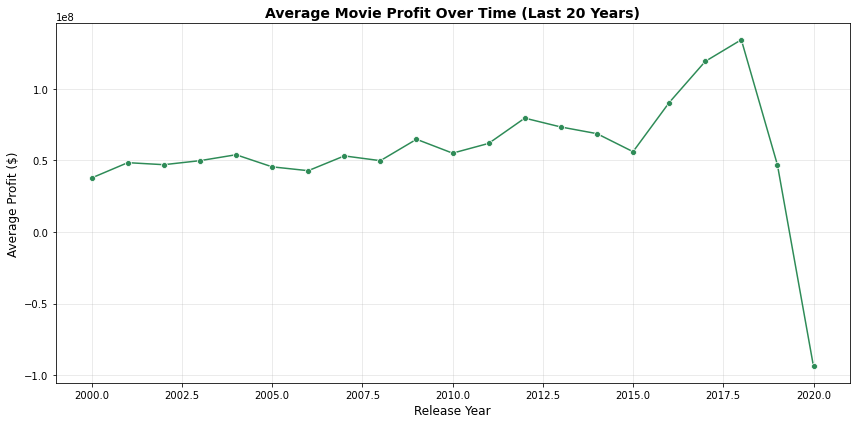

In [56]:


# Filter to last 20 years
recent_20 = df[df['release_year'] >= (df['release_year'].max() - 20)]

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(
    data=recent_20,
    x='release_year',
    y='profit',
    estimator='mean',
    ci=None,
    marker='o',
    color='seagreen'
)

plt.title('Average Movie Profit Over Time (Last 20 Years)', fontsize=14, weight='bold')
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Average Profit ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



2.Budget vs Worldwide Gross

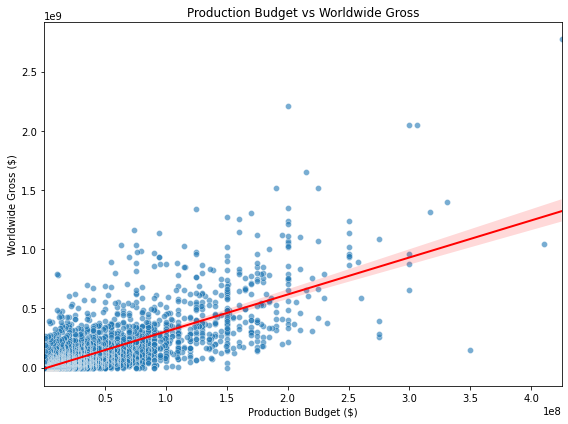

In [50]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='production_budget', y='worldwide_gross', alpha=0.6)
sns.regplot(data=df, x='production_budget', y='worldwide_gross',
            scatter=False, color='red', line_kws={'linewidth':2})
plt.title('Production Budget vs Worldwide Gross')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')
plt.tight_layout()
plt.show()


Return on Investment vs Releaase Month

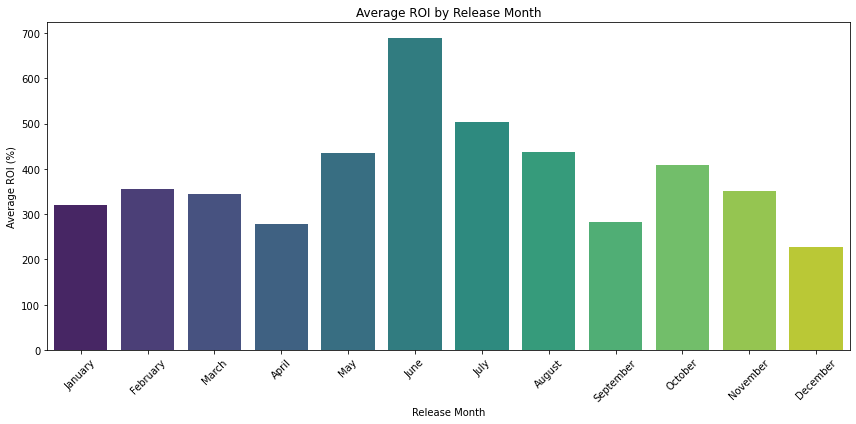

In [51]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12,6))
sns.barplot(data=df, x='month', y='roi', order=month_order, ci=None, palette='viridis')
plt.title('Average ROI by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Average ROI (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 10 Most Profitable Movies

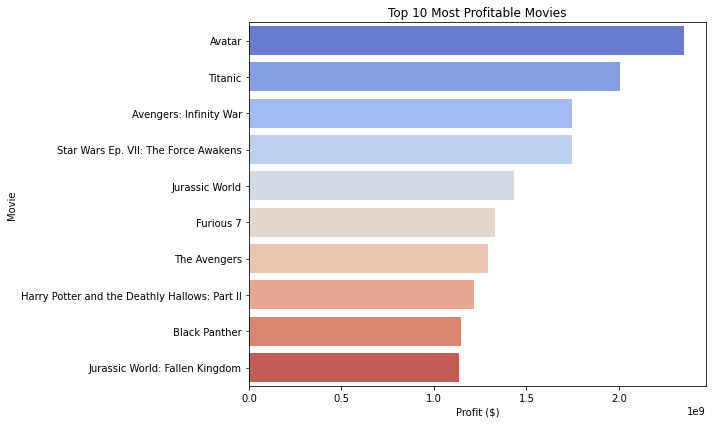

In [52]:
top10 = df.nlargest(10, 'profit')

plt.figure(figsize=(10,6))
sns.barplot(data=top10, y='movie_clean', x='profit', palette='coolwarm')
plt.title('Top 10 Most Profitable Movies')
plt.xlabel('Profit ($)')
plt.ylabel('Movie')
plt.tight_layout()
plt.show()


CONCLUSION

1. The most profitable years are those with big franchise releases like Marvel, Star Wars, or Avatar meaning small number of huge releases drive most of the industry’s profits .

2. While high-budget movies make the most money overall, their costs are so large that profits are often smaller.
Films with moderate budgets ($30M–$100M) tend to earn better returns compared to what they cost.

3. Movies released in summer (May–July) and holiday months (November–December) earn much higher ROI than those released early in the year or in slower months like September.

RECCOMENDATIONS

1. The business should focus on a few major, high-quality releases instead of many small ones.
Plan to release them during peak movie seasons — mainly summer and holidays — when audiences are most active.

2. The company should build a balanced portfolio which focusses on investing mainly in mid-budget films for steady profits. It should also back a few large-scale blockbusters each year for brand visibility.

3. The business should schedule big releases towards summer and holiday seasons while smaller or niche films should realease during spring or fall when competition is lower.